In [3]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la

from src.structured_random_features.src.models.weights import V1_weights

# Packages for fft and fitting data
from scipy import fftpack as fft
from sklearn.linear_model import Lasso

# Package for importing image representation
from PIL import Image, ImageOps

from src.V1_Compress import generate_Y, compress
import pandas as pd
import itertools

In [4]:
def opt_hyperparams(data): 
    # Try to use pd group_by to group repetition and get avg
    
    # Among those average, get the lowest error hyperparam
    
    return pd.DataFrame(data).sort_values(by = 'error', ascending = True).head(1)

In [ ]:
params = []
reformed = []
alpha = np.arange(1, 401, 5)
epoch = np.arange(10)+1

# Load Image
image_nm = 'image/tree_part1.jpg'
img = Image.open(image_nm)
img = ImageOps.grayscale(img)
img_arr = np.asarray(img)


# Load V1 weight
search_list = {'epoch': epoch,
               'alpha': alpha,
               'num_cell': [100, 200, 500],
               'cell_sz': [2, 5, 7],
               'sparse_freq': [1, 2, 5]
              }
# num_cell = [100, 200, 500]
# cell_sz = [2, 5, 7]
# sparse_freq = [1, 2, 5]
dim = img_arr.shape
n, m = dim

# use itertool to reduce amount of for loops
for row in itertools.product(*search_list.values()):
    product = dict(zip(search_list.keys(), row))
    epo, alp, num, sz, freq = product.values()
    W = V1_weights(num, dim, sz, freq) 
    y = generate_Y(W, img_arr)
    W_model = W.reshape(num, n, m)
    
    theta, reform, s = compress(W_model, y, a)
    error = np.linalg.norm(img - reform, 'fro') / np.sqrt(m*n)
    
    params.append({'epoch' : epo,
                   'num_cell' : num,
                   'cell_size' : sz,
                   'sparse_freq' : freq,'alpha': a,
                   'theta': theta,
                   'reform': reform,
                   'sparse': s,
                   'error' : error
                  })
        
        
    
    
    
    
    
#     for num in num_cell:
#         for sz in cell_size:
#             for freq in sparse_freq:
#                 W = V1_weights(num, dim, sz, freq) 
#                 y = generate_Y(W, img_arr)
#                 W_model = W.reshape(num, n, m)
#                 best_alpha = []
#                 for i, a in enumerate(alpha):
#                     theta, reform, s = compress(W_model, y, a)
#                     error = np.linalg.norm(img - reform, 'fro') / np.sqrt(m*n)
#                     params.append({'repetition' : i,
#                                    'num_cell' : num,
#                                    'cell_size' : sz,
#                                    'sparse_freq' : freq,'alpha': a,
#                                    'theta': theta,
#                                    'reform': reform,
#                                    'sparse': s,
#                                    'error' : error})
opt_param = opt_hyperarams(params)

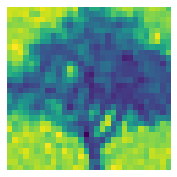

In [48]:
V1_reform = opt_param['reform'].to_numpy()[0]
plt.figure(figsize= (3,3))
plt.axis('off')
plt.imshow(V1_reform)
# use format string to name it with params
plt.savefig("tree_reconstruction.png", dpi = 200)

# Try grayscale color map

# Store original image of gray scale

,numCell,cellSize,sparseFreq,alpha,theta,reform,sparse,score
1701,500,5,1,1,"[[0.24597978400156112, -0.5072374723934677, 0....","[[214.37261950031467, 213.1457647207274, 209.0...","[4037.7474622998893, 361.6881308742081, 549.78...",12.969038


In [52]:
alpha = np.arange(1, 401, 5)
search_list = {'alpha': alpha,
          'cell_sz': [2, 5, 7],
          'num_cell': [100, 200, 500],
          'sparse_freq': [1, 2, 5]}
search_list

for row in itertools.product(*search_list.values()):
    product = dict(zip(search_list.keys(), row))
#     print(dict(product))
#     print(dict(product).values()[0])

In [54]:
a, b, c, d = product.values()

In [56]:
b

7

In [59]:
epoch = np.arange(10)+1
epoch

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
#Compress Sensing on function

In [39]:
## Check if this function is applicable to regular compress sensing
compress_img = Image.open("image/tree_part1.jpg")
compress_img = ImageOps.grayscale(compress_img)
compress_arr = np.asarray(compress_img)
cn, cm = compress_arr.shape
print(cn, cm)
compress_samp = 500#np.floor (cn * cm * 0.20).astype(int)
rand_index = np.random.randint(0, cn * cm, compressSamp)
compress_Y = compress_arr.flatten()[rand_index]
compress_Y compress_Y.reshape(compress_samp, 1)

30 30


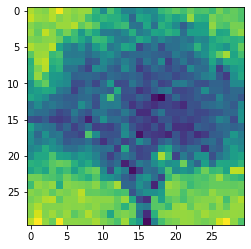

In [42]:
# Generate C matrix
C = np.eye(cn * cm)[rand_index, :]
C3D = C.reshape(compress_samp, cn, cm)
theta, compress_reform, s = compress(C3D, compress_Y, .0003)

plt.imshow(reform)

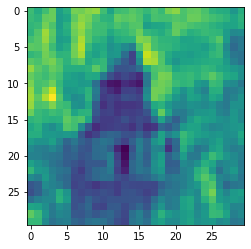

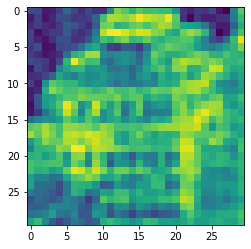

In [49]:
imgList = ["image/city_part2.png", "image/city_part3.png"]

for im in img_list:
    img = Image.open(im)
    img = ImageOps.grayscale(img)
    img_arr = np.asarray(img)

    # V1 Variables
    num_cell = 500
    cell_size = 5
    sparse_freq = 1
    dim = img_arr.shape
    n,m = dim

    W = V1_weights(num_cell, dim, cell_size, sparse_freq) 
    y = generate_Y(W, img_arr)
    W_rev = W.reshape(num_cell, n, m)
    theta, reform, s = compress(W_rev, y, 1)
    plt.imshow(reform)
    plt.show()

1. Save all the images for hyperparams, and hyperparams as well, save original image along with it
2. Try same with compress sensing
